<a href="https://colab.research.google.com/github/Rogerio-mack/work/blob/main/How_to_Clustering_Temporal_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Temporal Series

Suponha séries temporiais de demanda de vários diferentes produtos (centenas). Você quer organizar essas séries em algumas categorias em que as curvas de demandas são similares de forma que, por exemplo, séries de produtos com mais demandas no verão sejam colocadas em uma categoria, as de produtos de inverno em outra, produtos com demandas constantes o ano todo em outra e assim por diante. Para isso, uma abordagem comum é combinar métodos de análise de séries temporais com algoritmos de clusterização, para criar agrupamentos (clusters) com base na similaridade da evolução das séries ao longo do tempo.

Algumas das técnicas que podemos empregar para isso são:

- **Dynamic Time Warping (DTW) + K-means Clustering** (o DTW mede a similaridade entre duas séries temporais, mesmo que elas estejam fora de fase temporalmente)

- **Feature-Based Clustering**

- **Tranformada de Fourier**

- **K-shape Clustering**

- **Autoencoders**

Em todos os casos, após obter-se essas características das séries pode-se aplicar algoritmos tradicionais de clusterização como o K-médias, DBScan ou clusterização hierárquica.

In [2]:
!pip install tslearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 9.2 MB/s eta 0:00:00


In [17]:
import numpy as np

# Cria uma lista para armazenar as séries
series = []

# Gera 100 séries e adiciona à lista
for _ in range(100):
  serie = np.random.randint(0, 100, 12)
  series.append(serie)

# 10 séries provavelmente no mesmo cluster
for _ in range(10):
  series.append(np.linspace(np.random.randint(1,5),99,12))

series = np.round(np.array(series),0)

print(series[0:5])
print('...')
print(series[-5::])


[[58. 93.  0. 43. 40. 91. 37. 94. 69. 80. 61. 19.]
 [15. 94. 21. 71. 51. 37. 35. 33. 15. 67. 38. 76.]
 [10. 28. 41. 55. 59. 37. 73. 37. 43. 84. 14.  1.]
 [37. 11. 43. 84. 31. 91. 98. 40. 59. 55. 17. 10.]
 [ 3. 42. 65. 74. 15. 62. 72. 15. 97. 25. 14. 50.]]
...
[[ 2. 11. 20. 28. 37. 46. 55. 64. 73. 81. 90. 99.]
 [ 4. 13. 21. 30. 39. 47. 56. 64. 73. 82. 90. 99.]
 [ 3. 12. 20. 29. 38. 47. 55. 64. 73. 82. 90. 99.]
 [ 1. 10. 19. 28. 37. 46. 54. 63. 72. 81. 90. 99.]
 [ 2. 11. 20. 28. 37. 46. 55. 64. 73. 81. 90. 99.]]


In [19]:
import numpy as np
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw

# Usando DTW com K-means clustering
n_clusters = 5  # Número de clusters que queremos
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=42)

# Ajusta o modelo às séries
labels = model.fit_predict(series)

# Exibindo os clusters
for i in range(n_clusters):
    print(f"Séries no cluster {i}: {np.where(labels == i)[0]}")


Séries no cluster 0: [ 34  43  98 100 101 102 103 104 105 106 107 108 109]
Séries no cluster 1: [ 0  5 11 17 22 23 30 40 41 47 52 58 60 71 75 78 79 80 82 87 94 95]
Séries no cluster 2: [ 4  9 10 13 27 36 42 45 46 54 56 59 65 70 73 85 90 91 99]
Séries no cluster 3: [ 1  6  7  8 12 14 16 18 19 20 21 29 31 32 44 48 49 50 51 55 61 62 67 68
 69 72 74 76 77 83 84 88 89]
Séries no cluster 4: [ 2  3 15 24 25 26 28 33 35 37 38 39 53 57 63 64 66 81 86 92 93 96 97]


Séries no cluster 0: [ 34  43  98 100 101 102 103 104 105 106 107 108 109]


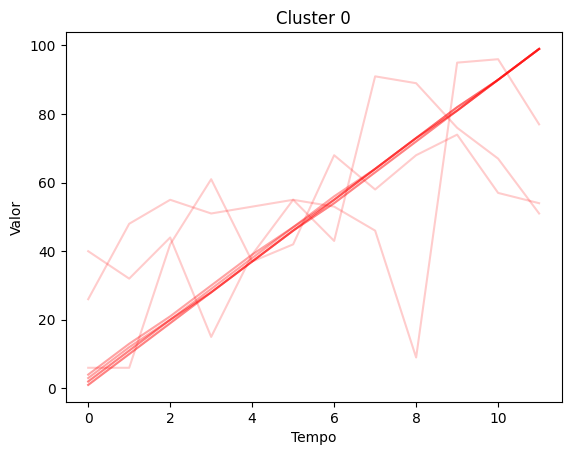

Séries no cluster 1: [ 0  5 11 17 22 23 30 40 41 47 52 58 60 71 75 78 79 80 82 87 94 95]


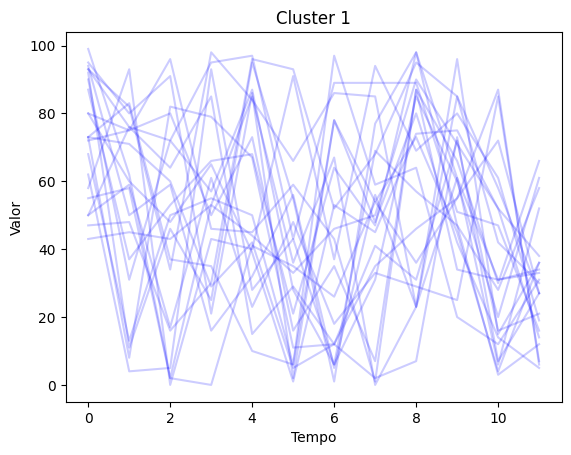

Séries no cluster 2: [ 4  9 10 13 27 36 42 45 46 54 56 59 65 70 73 85 90 91 99]


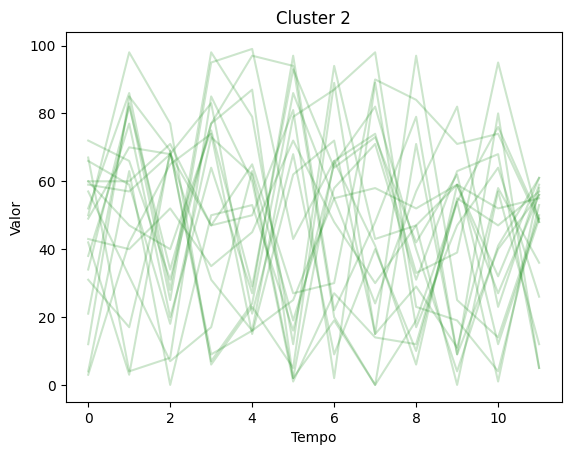

Séries no cluster 3: [ 1  6  7  8 12 14 16 18 19 20 21 29 31 32 44 48 49 50 51 55 61 62 67 68
 69 72 74 76 77 83 84 88 89]


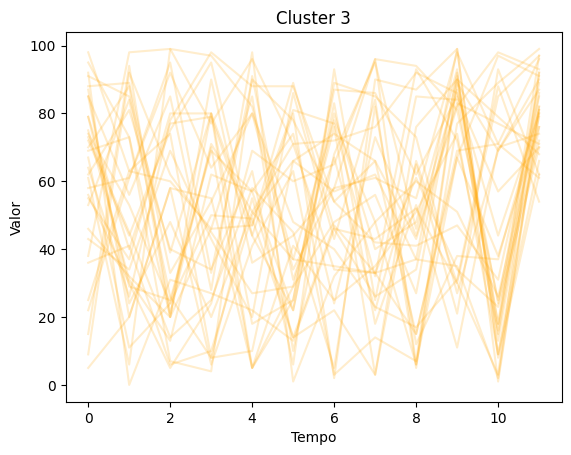

Séries no cluster 4: [ 2  3 15 24 25 26 28 33 35 37 38 39 53 57 63 64 66 81 86 92 93 96 97]


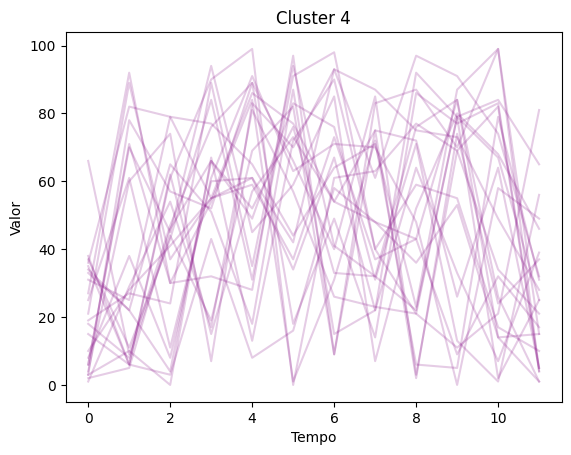

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

color = ['red', 'blue', 'green', 'orange', 'purple']

for i in range(n_clusters):
  print(f"Séries no cluster {i}: {np.where(labels == i)[0]}")
  for j in np.where(labels == i)[0]:
    plt.plot(series[j],color=color[i],alpha=0.2)

  plt.title(f"Cluster {i}")
  plt.xlabel("Tempo")
  plt.ylabel("Valor")
  plt.show()
